# Backprop своими руками

Материалы:

* [Andrew Karpahy: yes, you should understand backprop.](https://medium.com/@karpathy/yes-you-should-understand-backprop-e2f06eab496b)
* [Stanford CS231n](http://cs231n.stanford.edu/)
* [Deep Learning](http://sereja.me/f/deep_learning_goodfellow.pdf) — с 204 страницы и до прозрения

Зачем нужны фреймворки в DL? Они реализуют часто используемые на практике слои. Можно вообще написать нейросеть на чистом С++.

Посчитать градиенты и проанализировать поведение всех слоев в современных нейросетях нужно ровно один раз в жизни — и дальше пользоваться готовыми абстракциями. В этой домашке вы это и будете делать.

Вам нужно реализовать свой небольшой фреймворк глубокого обучения на чистом `numpy`. В нем должны быть основные слои и абстракции современных фреймворков, основанных на динамических вычислительных графах (Torch, PyTorch, Chainer, DyNet...).

* Чтобы лучше понять, что должно в итоге получиться, изучите «игрушечный пример» и вообще эту тетрадку, а потом начните читать `hw_framework.py`, где будет более техничное описание.
* Для дебага проверяйте градиенты численно — сдвигайте параметры на какой-нибудь эпсилон и смотрите разницу.
* Пишите код без циклов — в питоне они очень долгие; все вычисления можно делать внутри numpy.
* Жесткого ограничение на срок сдачи нет. Дописывайте его постепенно, разбираясь, как работает каждая функция активации.
* Обсуждайте математику и общую архитектуру фреймворка, но не шарьте друг другу код — так не интересно.

Предполагаемый порядок выполнения:
* Прочитайте теорию про backpropagation
* Изучите пример с логситической регрессией, чтобы понять, что от вас в итоге хотят
* Изучите код `Module`
* `Sequential`
* `Linear`
* `SoftMax`
* `CrossEntropy`
* Протестируйте их на логситической регрессии
* Напишите код для решения MNIST
* Дописывайте остальные слои, пока не получите на нем 95%

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

---

Откройте в Jupyter две тетрадки — эту и `hw_modules.ipynb`. В этой содержится train loop, а там непосредственно ваш «фреймворк», который вам ещё предстоит написать. Там есть комменты — они облегчат вам задачу.

* Каждый модуль должен **возвращать** и **хранить** `output` и `gradInput`
* Считайте, что `module.backward` всегда выполняется после `module.forward`, который сохранит в себе `output`

Аналогично языковой модели с отбора, если придумаете какой-то более клёвый дизайн — вы вольны использовать его.

In [ ]:
%run hw_modules.ipynb

Реализация градиентного спуска. Очень проста: просто итерариуется по всем параметрам и их градиентам и 

Стохастический градиентный спуск. Итерируется по параметрам. Градиенты должны быть уже посчитаны.'

Вообще, более сложные оптимизаторы устроены намного сложнее. Обычно, логику пишут внутри.

In [2]:
def SGD(params, gradients, lr=1e-3):    
    for weights, gradient in zip(params, gradients):
        weights -= lr * gradients

# Игрушечный пример

Начнем с логистической регрессии на синтезированных данных.

В этой секции ничего менять не надо — она нужна, чтобы отдебажить ваши слои в `hw_modules`.

Возьмем в качестве датасета точки из двух гауссиан на плоскости.

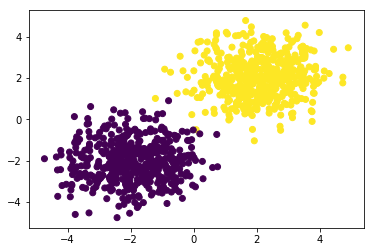

In [3]:
n = 500

X1 = np.random.randn(n, 2) + np.array([2, 2])
X2 = np.random.randn(n, 2) + np.array([-2, -2])
X = np.vstack([X1, X2])

Y = np.concatenate([np.ones(n), np.zeros(n)])[:, None]
Y = np.hstack([Y, 1-Y])

plt.scatter(X[:,0],X[:,1], c = Y[:,0])
plt.show()

Обратите внимание на `y`. Он в формате one-hot: у каждого вектора все нули, кроме одной единицы.

Выходные данные в таком формате упростят написание `CrossEntropy`.

In [6]:
Y.shape

(1000, 2)

Cоздадим обертку вокруг нашего датасета, которую будем потом использовать, чтобы итерироваться по нему.

In [ ]:
def loader(X, Y, batch_size):    
    n = X.shape[0]

    # в начале каждой эпохи будем всё перемешивать
    # важно, что мы пермешиваем индексы, а не X
    indices = np.arange(n)
    np.random.shuffle(indices)
    
    for start in range(0, n, batch_size):
        # в конце нам, возможно, нужно взять неполный батч
        end = min(start + batch_size, n)
        
        batch_idx = indices[start:end]
    
        yield X[batch_idx], Y[batch_idx]

### Модель

Логистическая регрессия — это тоже как бы маленькая нейронка: линейный слой, софтмакс, и максимизируем правдоподобие.

In [ ]:
model = Sequential(
    Linear(2, 2),
    SoftMax()
)

criterion = CrossEntropy()

Можете тут потом тестировать остальные свои слои, когда их напишите.

### Обучение

In [ ]:
epochs = 20
batch_size = 128
learning_rate = 1e-2

In [ ]:
history = []

for i in range(epochs):
    for x, y_true in loader(X, Y, batch_size):
        # forward -- считаем все значения до функции потерь
        y_pred = model.forward(x)
        loss = criterion.forward(y_pred, y)
    
        # backward -- считаем все градиенты в обратном порядке
        grad = criterion.backward(predictions, y_true)
        net.backward(x, grad)
        
        # обновляем веса
        sgd_momentum(model.parameters(),
                     model.grad_parameters(),
                     learning_rate)
        
        lhistory.append(loss)

    
plt.title("Training loss")
plt.xlabel("iteration")
plt.ylabel("loss")
plt.plot(loss_history, 'b')
plt.show()

Мы тут пропустили много важных деталей: валидация, подсчет точности (кроссэнтропия не очень инфорамативна), регуляризация. Вам всё это нужно будет реализовать потом.

# Теперь сами

[MNIST](http://yann.lecun.com/exdb/mnist/) — это стандартный датасет для классификации, на котором все всё тестируют. По значимости он как дрозофилы в эволюционной биологии или коты в квантовой физике.

In [ ]:
import os
from sklearn.datasets import fetch_mldata
# эти библиотеки нужны только для того, чтобы его скачать

if os.path.exists('mnist.npz'):
    with np.load('mnist.npz', 'r') as data:
        X = data['X']
        y = data['y']
else:
    mnist = fetch_mldata("mnist-original")
    # очень важно его отнормировать -- см. Linear в hw_framework
    X = mnist.data / 255.0
    y = mnist.target
    np.savez('mnist.npz', X=X, y=y)

Переведите лейблы в one-hot.

In [ ]:
# ...

Разделите датасет на train и validation.

In [ ]:
# ...

Теперь напишите модель и train loop. Можете начать с адаптации предыдущего примера.

Дальше начинается творческая часть и настоящий Deep Learning:
* Поиграйтесь с архитектурами
* Поиграйтесь с learning rate и batch_size
* Сделайте learning rate decay
* Сделайте data augmentation

In [ ]:
# ...

Выведите точность. Даже без всяких продвинутых свёрточных сетей легко можно достичь 95%, но нормально, если получится около 90%.

In [ ]:
# ...